In [3]:
import pandas as pd
df = pd.read_csv("sjogren_pubmed.csv")
df.tail(10)

,body
6741,[ON THE DIFFERENTIATION OF THE SALIVARY GLAND ...
6742,THE RELATION OF SJOEGREN'S SYNDROME TO RHEUMAT...
6743,A SPECIFIC ANTIBODY AGAINST THE EPITHELIUM OF ...
6744,"THE TYROSINE, TRYPTOPHAN AND PROTEIN CONTENT O..."
6745,ANTIBODIES IN SYSTEMIC LUPUS ERYTHEMATOSUS AND...
6746,AUTO-ANTIBODIES TO CELL NUCLEI.
6747,SJOEGREN'S SYNDROME AND ITS RELATION TO CONNEC...
6748,GENETIC STUDIES OF SYSTEMIC LUPUS ERYTHEMATOSUS.
6749,[CLINICAL ASPECTS OF POLYARTHROSES].
6750,[THE LIVER IN THE RHEUMATIC-HYPERERGIC TYPE OF...


In [4]:
import gensim
def read_questions(row,column_name):
    return gensim.utils.simple_preprocess(str(row[column_name]).encode('utf-8'))
    
documents = []
for index, row in df.iterrows():
    documents.append(read_questions(row,"body"))

In [5]:
print("List of lists. Let's confirm: ", type(documents), " of ", type(documents[0]))

List of lists. Let's confirm:  <class 'list'>  of  <class 'list'>


In [6]:
model = gensim.models.Word2Vec(size=4695, window=10, min_count=2, sg=1, workers=10)
model.build_vocab(documents)

In [7]:
model.train(sentences=documents, total_examples=len(documents), epochs=model.iter)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """Entry point for launching an IPython kernel.


(282239, 408265)

In [8]:
word_vectors = model.wv
count = 0
for word in word_vectors.vocab:
    if count<10:
        print(word)
        count += 1
    else:
        break

conjunctiva
chromatid
identical
ancestry
hodgkin
useful
acitretin
stroma
alcohol
along


In [9]:
len(word_vectors.vocab)

4695

In [10]:
vector = model.wv["biomarkers"]  # numpy vector of a word
len(vector)

4695

In [11]:
vector

array([-0.03187458, -0.03847782,  0.02340448, ...,  0.01399704,
       -0.00748234, -0.02301625], dtype=float32)

In [12]:
wanted_words = []
count = 0
for word in word_vectors.vocab:
    if count<150:
        wanted_words.append(word)
        count += 1
    else:
        break
wanted_vocab = dict((k, word_vectors.vocab[k]) for k in wanted_words if k in word_vectors.vocab)
wanted_vocab

{'acitretin': <gensim.models.keyedvectors.Vocab at 0x7fd2e9008240>,
 'adenitis': <gensim.models.keyedvectors.Vocab at 0x7fd2e9008940>,
 'adjustment': <gensim.models.keyedvectors.Vocab at 0x7fd2e8f95c50>,
 'aero': <gensim.models.keyedvectors.Vocab at 0x7fd2e8fded68>,
 'agreement': <gensim.models.keyedvectors.Vocab at 0x7fd2e8fdef60>,
 'alcohol': <gensim.models.keyedvectors.Vocab at 0x7fd2e9008278>,
 'algorithm': <gensim.models.keyedvectors.Vocab at 0x7fd2e8fdeeb8>,
 'allografts': <gensim.models.keyedvectors.Vocab at 0x7fd2e8fde8d0>,
 'allows': <gensim.models.keyedvectors.Vocab at 0x7fd2e8fb1128>,
 'along': <gensim.models.keyedvectors.Vocab at 0x7fd2e90082b0>,
 'alx': <gensim.models.keyedvectors.Vocab at 0x7fd2e95175f8>,
 'anaerobius': <gensim.models.keyedvectors.Vocab at 0x7fd2f3401390>,
 'ancestry': <gensim.models.keyedvectors.Vocab at 0x7fd2e8f95b38>,
 'anti': <gensim.models.keyedvectors.Vocab at 0x7fd2e8fdea90>,
 'architecture': <gensim.models.keyedvectors.Vocab at 0x7fd2e8fc1c50>,
 

In [13]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
X = model[wanted_vocab] # X is an array of word vectors, each vector containing 150 tokens
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
Y = tsne_model.fit_transform(X)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


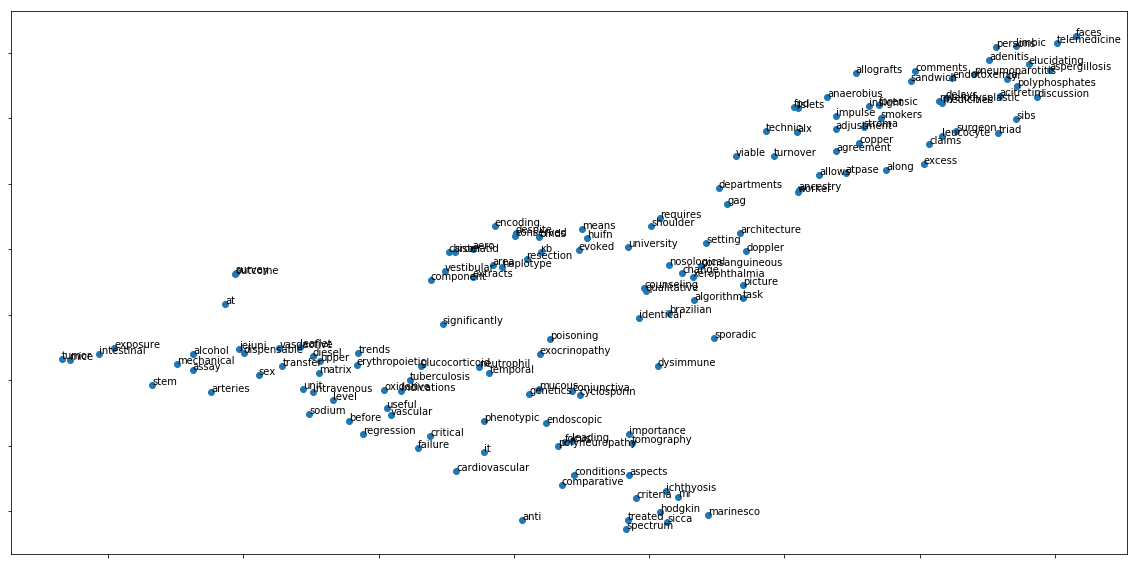

In [14]:
#Plot the t-SNE output
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(Y[:, 0], Y[:, 1])
words = list(wanted_vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
ax.set_yticklabels([]) #Hide ticks
ax.set_xticklabels([]) #Hide ticks
_ = plt.show()


In [15]:
words = list(wanted_vocab)
len(words)

150

In [16]:
w1 = "sjogren"
x=model.wv.most_similar(positive=w1, topn=5)
x

[('sjögren', 0.9884534478187561),
 ('marinesco', 0.9827717542648315),
 ('primary', 0.9804255962371826),
 ('malt', 0.9796401262283325),
 ('findings', 0.9774820804595947)]

In [17]:
model.wv.doesnt_match(["sjogren","men","women"])

'sjogren'

In [18]:
w1 = ["women","men"]
w2 = ["sjogren"]
model.wv.most_similar (positive=w1,negative=w2,topn=2)

[('nursing', 0.9566958546638489), ('coronary', 0.9528749585151672)]

In [19]:
model.wv.most_similar(positive="sjogren",topn=5)

[('sjögren', 0.9884534478187561),
 ('marinesco', 0.9827717542648315),
 ('primary', 0.9804255962371826),
 ('malt', 0.9796401262283325),
 ('findings', 0.9774820804595947)]

# Filtering(similarity>0.9):

In [84]:
if "sjogren" in model.wv:
    print("y")
else:
    print("n")

y


In [55]:
def distance(word):
    s=[('sjogren',1.0)]
    step1=[]
    w1 = word
    x=model.wv.most_similar(positive=w1,topn=10000)
    for i in x:
        d = list(i)
        s.append(d)
    for a,b in s:
        if b>0.9:
            step1.append((a,b))
    return step1
#or
#q=[item for item in model.wv.most_similar(positive="sjogren",topn=1000) if item[1]>0.9]
#q

In [56]:
y=distance("sjogren")
print(len(y))
y

153


[('sjogren', 1.0),
 ('sjögren', 0.9884534478187561),
 ('marinesco', 0.9827717542648315),
 ('primary', 0.9804255962371826),
 ('malt', 0.9796401262283325),
 ('findings', 0.9774820804595947),
 ('rare', 0.9759901762008667),
 ('neuropathy', 0.9750803112983704),
 ('gougerot', 0.9746687412261963),
 ('sicca', 0.9741374850273132),
 ('imaging', 0.9738187193870544),
 ('features', 0.9727266430854797),
 ('syndrome', 0.9705267548561096),
 ('presenting', 0.9687321782112122),
 ('diagnosis', 0.9687308073043823),
 ('manifestation', 0.9674481153488159),
 ('hypokalemic', 0.9670185446739197),
 ('neurological', 0.9654171466827393),
 ('lymphoma', 0.9637541770935059),
 ('apropos', 0.9623117446899414),
 ('paralysis', 0.9620411396026611),
 ('purpura', 0.961801290512085),
 ('complicated', 0.9614608287811279),
 ('diagnostic', 0.9592366218566895),
 ('mr', 0.9581522941589355),
 ('recurrent', 0.9581077098846436),
 ('cases', 0.9578701257705688),
 ('initial', 0.9572352170944214),
 ('unusual', 0.9568839073181152),
 ('d

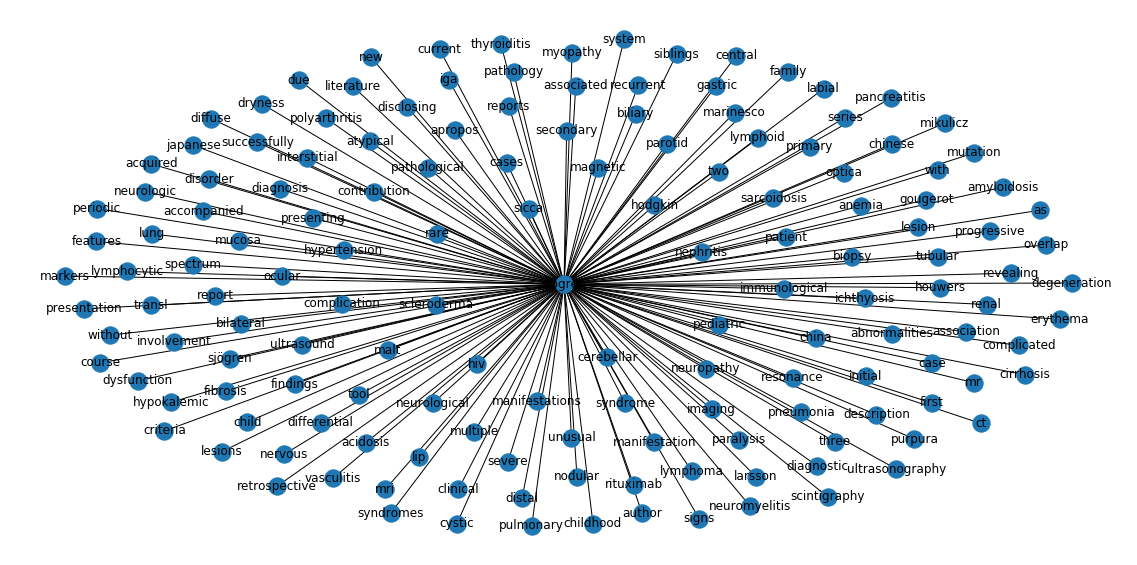

In [68]:
import networkx as nx
fig, ax = plt.subplots(figsize=(20,10))
g = nx.Graph()
for word1,dist in y:
    # cosine similarity makes more sense for edge weight
    g.add_edge(word1,"sjogren", weight=float(dist))

# Write the network
nx.draw(g, with_labels=True)
plt.show()


In [51]:
def dis(word):
    s=[('sjogren',1.0)]
    step1=[]
    w1 = word
    x=model.wv.most_similar(positive=w1,topn=10000)
    for i in x:
        d = list(i)
        s.append(d)
    for a,b in s:
        if b>0.9:
            step1.append(a)
    return step1

In [52]:
w=dis("sjogren")
w

['sjogren',
 'sjögren',
 'marinesco',
 'primary',
 'malt',
 'findings',
 'rare',
 'neuropathy',
 'gougerot',
 'sicca',
 'imaging',
 'features',
 'syndrome',
 'presenting',
 'diagnosis',
 'manifestation',
 'hypokalemic',
 'neurological',
 'lymphoma',
 'apropos',
 'paralysis',
 'purpura',
 'complicated',
 'diagnostic',
 'mr',
 'recurrent',
 'cases',
 'initial',
 'unusual',
 'disclosing',
 'sarcoidosis',
 'biopsy',
 'parotid',
 'nervous',
 'lymphocytic',
 'acidosis',
 'nodular',
 'acquired',
 'amyloidosis',
 'ichthyosis',
 'bilateral',
 'tubular',
 'presentation',
 'differential',
 'involvement',
 'revealing',
 'renal',
 'secondary',
 'biliary',
 'mutation',
 'pneumonia',
 'two',
 'scleroderma',
 'cirrhosis',
 'hodgkin',
 'neurologic',
 'course',
 'myopathy',
 'patient',
 'case',
 'successfully',
 'fibrosis',
 'mucosa',
 'larsson',
 'pediatric',
 'lesion',
 'child',
 'series',
 'severe',
 'interstitial',
 'spectrum',
 'rituximab',
 'author',
 'transl',
 'japanese',
 'distal',
 'vasculitis

In [53]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
X = model[w] # X is an array of word vectors, each vector containing 150 tokens
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
Y = tsne_model.fit_transform(X)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


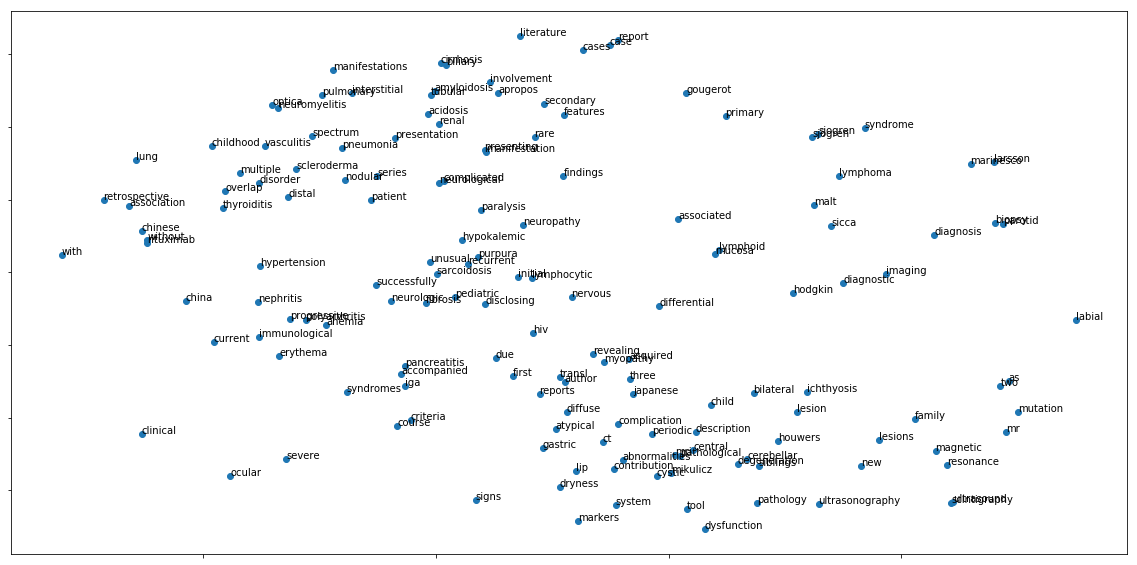

In [54]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(Y[:, 0], Y[:, 1])
words = w
for i, word in enumerate(words):
    plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
ax.set_yticklabels([]) #Hide ticks
ax.set_xticklabels([]) #Hide ticks
_ = plt.show()

# Search Function:

In [23]:
def search(word):
    s=[]
    step1=[]
    w1 = word
    x=model.wv.most_similar(positive=w1, topn=5)
    for i in x:
        print(i)
    for i in x:
        d = list(i)
        s.append(d)
    for a,b in s:
        step1.append(a)
    for u in step1:
        print('\n','for',u,model.wv.most_similar(positive= u , topn=5))

In [45]:
search("sjogren")

('sjögren', 0.9884534478187561)
('marinesco', 0.9827717542648315)
('primary', 0.9804255962371826)
('malt', 0.9796401262283325)
('findings', 0.9774820804595947)

 for sjögren [('sjogren', 0.9884534478187561), ('primary', 0.9716190099716187), ('findings', 0.9711771607398987), ('marinesco', 0.9703555107116699), ('malt', 0.9676377177238464)]

 for marinesco [('sjogren', 0.9827716946601868), ('larsson', 0.9816094040870667), ('mutation', 0.9770025610923767), ('imaging', 0.9745982885360718), ('syndrome', 0.9731553196907043)]

 for primary [('gougerot', 0.9916558265686035), ('malt', 0.990683376789093), ('features', 0.9886323809623718), ('findings', 0.988631010055542), ('rare', 0.9869505167007446)]

 for malt [('imaging', 0.9941573739051819), ('primary', 0.9906832575798035), ('findings', 0.9901560544967651), ('lymphoma', 0.9888549447059631), ('mucosa', 0.9875799417495728)]

 for findings [('manifestation', 0.997304379940033), ('hypokalemic', 0.9967670440673828), ('rare', 0.9967048764228821), ('

In [70]:
with open('pubmed_list.txt', 'w') as f:
    for item in w:
        f.write("%s\n" % item)
